In [6]:
# This notebook presents a simulation of a pool of Renshaw cells (RC) with a current injected (iInjected) in their soma.

In [7]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from InterneuronPool import InterneuronPool
from NeuralTract import NeuralTract
from SynapsesFactory import SynapsesFactory
from jointAnkleForceTask import jointAnkleForceTask

In [8]:
conf = Configuration('confInjectedCurrentRenshawCellPool.rmto')
conf.simDuration_ms = 100 # Here I change simulation duration without changing the Configuration file.

In [9]:
# Time vector for the simulation
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

membPotential = np.zeros_like(t, dtype = 'd')

In [10]:
pools = []
pools.append(InterneuronPool(conf, 'RC'))

noise = []


# The simulation  itself

tic = time.clock()
for i in xrange(0,len(t)-1):
    # Here you can change the injected current in the Resnhaw cell during the simulation
    for j in pools[0].unit:
        j.iInjected = 10
    pools[0].atualizeInterneuronPool(t[i])
    membPotential[i] = pools[0].unit[175].v_mV # This command records the membrane potential of the RC with index 175.
toc = time.clock()
print str(toc - tic) + ' seconds'

Interneuron Pool of RC built
65.149812 seconds


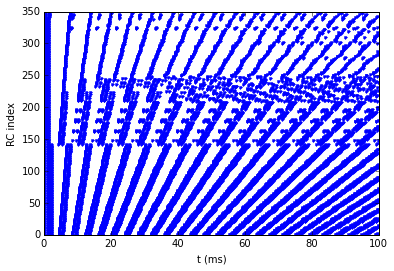

In [11]:
pools[0].listSpikes()

plt.plot(pools[0].poolSomaSpikes[:, 0],
    pools[0].poolSomaSpikes[:, 1]+1, '.')

plt.xlabel('t (ms)')
plt.ylabel('RC index')

plt.show()

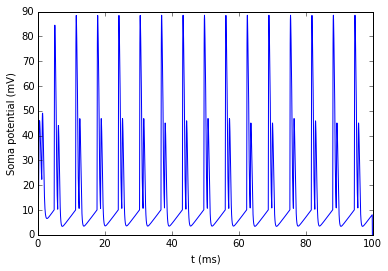

In [12]:
plt.plot(t, membPotential, '-')

plt.xlabel('t (ms)')
plt.ylabel('Soma potential (mV)')

plt.show()